<a href="https://colab.research.google.com/github/harshithap99/open-lab/blob/master/final%20first%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
EPOCHS = 30
INIT_LR = 1e-3
default_image_size = tuple((256, 256))
directory_root ='/content/drive/My Drive/DATASET/LabelledRice'
width=256
height=256
depth=3

In [0]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("Image loading completed")  
except Exception as e:
    print(f"Error : {e}")



[INFO] Loading images ...
[INFO] Processing Hispa ...
[INFO] Processing LeafBlast ...
[INFO] Processing Healthy ...
[INFO] Processing BrownSpot ...
[INFO] Image loading completed


In [47]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
print(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

['Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 'Hispa', 

In [37]:
print(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float16)
print(np_image_list)
np_image_list = np_image_list/255.0
print(np_image_list)

['BrownSpot' 'Healthy' 'Hispa' 'LeafBlast']
[[[[228. 171. 148.]
   [227. 171. 146.]
   [227. 171. 147.]
   ...
   [221. 163. 145.]
   [225. 167. 150.]
   [225. 166. 149.]]

  [[231. 175. 151.]
   [229. 173. 148.]
   [228. 172. 149.]
   ...
   [222. 164. 145.]
   [224. 165. 148.]
   [223. 164. 146.]]

  [[226. 170. 146.]
   [230. 174. 150.]
   [230. 174. 149.]
   ...
   [228. 169. 153.]
   [223. 165. 146.]
   [226. 166. 150.]]

  ...

  [[225. 169. 144.]
   [226. 170. 145.]
   [226. 170. 146.]
   ...
   [221. 165. 140.]
   [218. 162. 137.]
   [218. 162. 137.]]

  [[227. 170. 146.]
   [230. 174. 150.]
   [227. 171. 146.]
   ...
   [222. 166. 141.]
   [221. 165. 140.]
   [221. 165. 140.]]

  [[227. 170. 146.]
   [230. 174. 149.]
   [230. 174. 149.]
   ...
   [221. 165. 140.]
   [220. 164. 139.]
   [220. 164. 139.]]]


 [[[250. 189. 179.]
   [252. 190. 181.]
   [248. 187. 177.]
   ...
   [217. 173. 167.]
   [221. 173. 168.]
   [227. 179. 175.]]

  [[244. 187. 176.]
   [245. 188. 177.]
   [

In [13]:
x_train,x_valid,y_train,y_valid = train_test_split(np_image_list,image_labels,test_size=0.2,random_state=42)
#dividing the training dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_valid.shape,y_valid.shape,x_test.shape,y_test.shape


((2146, 256, 256, 3),
 (2146, 4),
 (671, 256, 256, 3),
 (671, 4),
 (537, 256, 256, 3),
 (537, 4))

In [0]:
aug = ImageDataGenerator(
    rotation_range=30, width_shift_range=0.15,
    height_shift_range=0.15, shear_range=0.15, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [0]:
model = Sequential()

inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
  
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(n_classes))
model.add(Activation("softmax"))


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)       

In [0]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [0]:

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', verbose=1, monitor='acc', save_best_only=True, mode='auto')

In [19]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=32),
    validation_data=(x_valid, y_valid),
    steps_per_epoch=len(x_train) // 32,
    epochs=EPOCHS, verbose=1,
    callbacks=[checkpoint]
    )


Epoch 1/30
67/67 [==============================] - 533s 8s/step - loss: 0.8677 - accuracy: 0.6995 - val_loss: 1.1164 - val_accuracy: 0.6155
Epoch 2/30


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


67/67 [==============================] - 527s 8s/step - loss: 0.6712 - accuracy: 0.7232 - val_loss: 0.8985 - val_accuracy: 0.6162
Epoch 3/30
67/67 [==============================] - 528s 8s/step - loss: 0.6222 - accuracy: 0.7333 - val_loss: 0.5462 - val_accuracy: 0.7470
Epoch 4/30
67/67 [==============================] - 528s 8s/step - loss: 0.6037 - accuracy: 0.7449 - val_loss: 0.8444 - val_accuracy: 0.6151
Epoch 5/30
67/67 [==============================] - 532s 8s/step - loss: 0.5653 - accuracy: 0.7508 - val_loss: 0.5996 - val_accuracy: 0.6654
Epoch 6/30
67/67 [==============================] - 532s 8s/step - loss: 0.5636 - accuracy: 0.7444 - val_loss: 0.7407 - val_accuracy: 0.6926
Epoch 7/30
67/67 [==============================] - 531s 8s/step - loss: 0.5695 - accuracy: 0.7462 - val_loss: 0.5998 - val_accuracy: 0.7325
Epoch 8/30
67/67 [==============================] - 531s 8s/step - loss: 0.5738 - accuracy: 0.7377 - val_loss: 0.5967 - val_accuracy: 0.7321
Epoch 9/30
67/67 [======

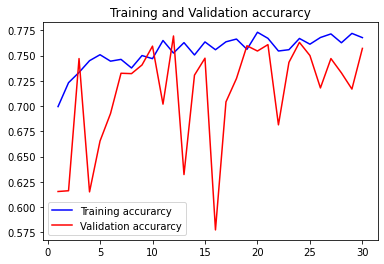

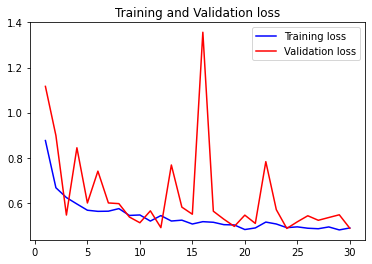

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [56]:

print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
537/537 [==============================] - 34s 63ms/step
Test Accuracy: 77.97951698303223


In [0]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)
y_true = np.argmax(y_test,axis = 1).astype(int)
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
   # checking for correct predictions
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1

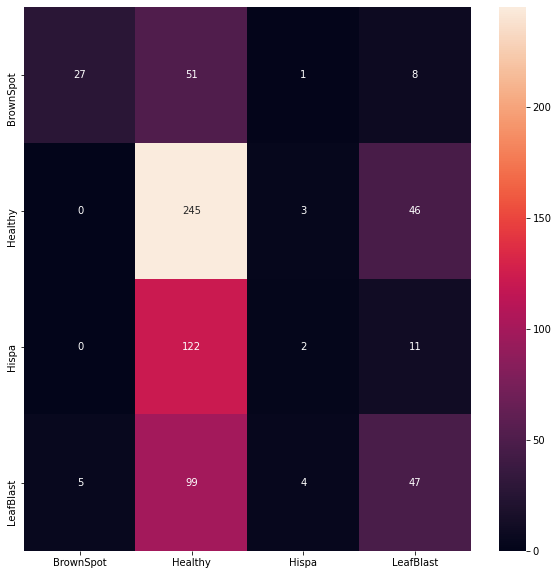

In [40]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(label_list))
ax.set_yticklabels(np.unique(label_list))
plt.show()

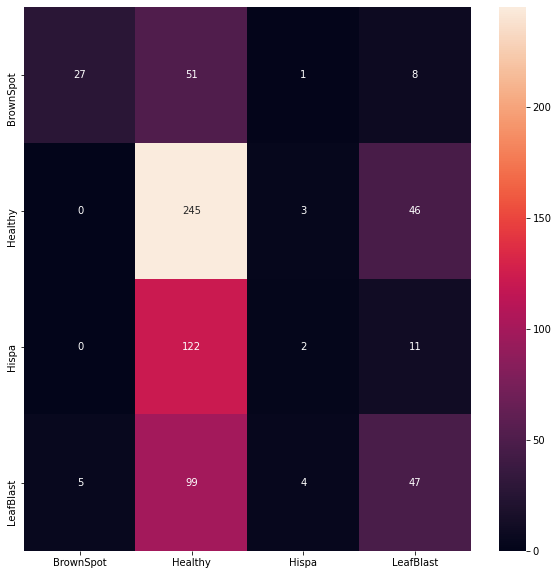

In [41]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(label_list))
ax.set_yticklabels(np.unique(label_list))
plt.show()